In [16]:
import matplotlib 
matplotlib.font_manager._rebuild()

In [93]:
from matplotlib import font_manager, rc

f_path = '/Library/Fonts/AppleSDGothicNeo.ttc'
# font_name = font_manager.FontProperties(fname=f_path).get_name()
plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
%matplotlib inline

In [35]:
sns.set(font="Apple SD Gothic Neo", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [36]:
for font in font_manager.fontManager.ttflist:
    if 'Apple' in font.name:
        print (font.name, font.fname)

AppleGothic /System/Library/Fonts/Supplemental/AppleGothic.ttf
Apple Braille /System/Library/Fonts/Apple Braille Outline 6 Dot.ttf
Apple Braille /System/Library/Fonts/Apple Braille Outline 8 Dot.ttf
Apple Chancery /System/Library/Fonts/Supplemental/Apple Chancery.ttf
Apple Braille /System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf
Apple Braille /System/Library/Fonts/Apple Braille.ttf
Apple SD Gothic Neo /System/Library/Fonts/AppleSDGothicNeo.ttc
AppleMyungjo /System/Library/Fonts/Supplemental/AppleMyungjo.ttf
Apple Braille /System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf
Apple Symbols /System/Library/Fonts/Apple Symbols.ttf


Text(0.3, 0.3, '한글')

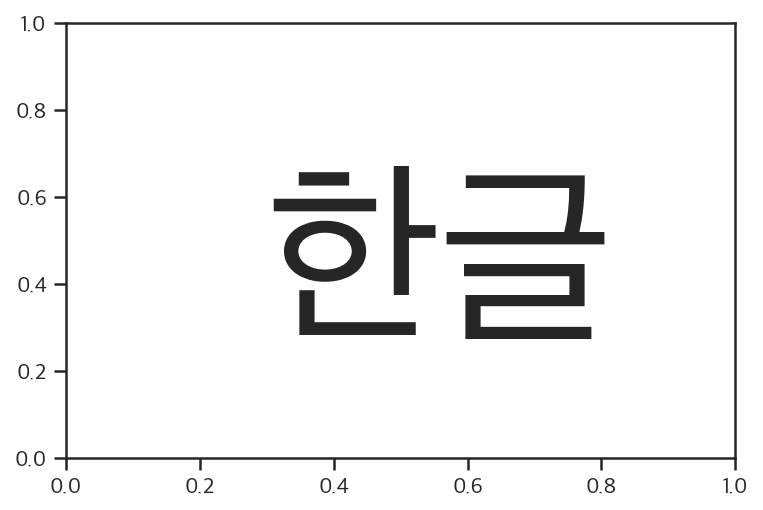

In [53]:
plt.text(0.3, 0.3, '한글', size=100)

<AxesSubplot:title={'center':'한글폰트'}>

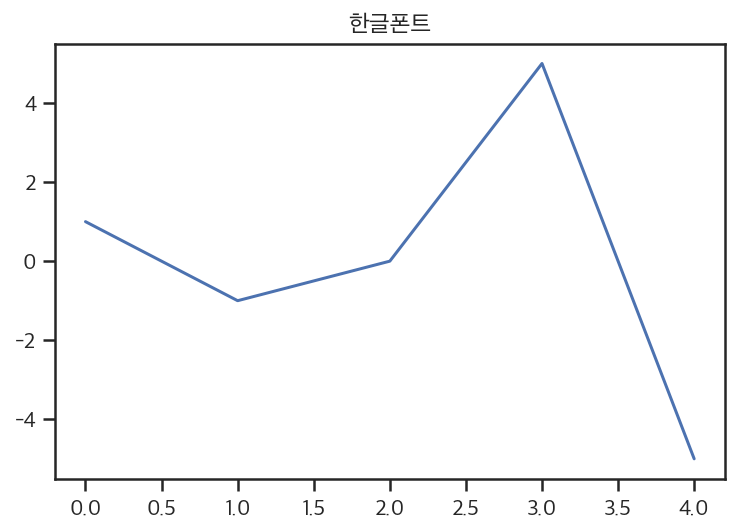

In [54]:
pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

In [40]:
df = pd.read_csv('./datas/industry_merged.csv', encoding='utf-8')
df.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,54,40785394,2029565,3096864,2885231,3.670,4.955,36.710,6.780,13.245,7.915,150470135,26444487
1,건설업,2006,57,44745972,2755247,3657870,3652228,12.410,5.850,46.305,7.950,14.790,8.855,153315180,33138291
2,건설업,2007,57,47834524,2802313,3566035,3718370,5.065,4.870,38.700,6.545,11.275,6.450,166693235,53907176
3,건설업,2008,56,53570702,3195413,3672975,4577360,16.480,4.120,37.405,6.090,9.690,5.475,180679909,22653768
4,건설업,2009,55,61989084,1812152,3385664,2769115,18.770,2.270,24.915,3.400,5.765,3.150,188031835,31828104


In [3]:
df = sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [4]:
df.shape

(44, 3)

In [6]:
df.columns

Index(['산업분류', '년도', '회사수 (개)', '매출액 (백만원)', '당기순이익 (백만원)', '영업이익 (백만원)',
       '경상이익 (백만원)', '매출액증가율 (%)', '매출액이익률 (%)', '납입자본이익률 (%)', '매출액경상이익률 (%)',
       '자기자본이익률 (%)', '총자본경상이익률 (%)', '시장규모', '시총'],
      dtype='object')

In [66]:
df_not_manuf = df[df['산업분류'] != '제조업']
df_not_manuf['산업분류'].unique()

array(['건설업', '광업', '기계', '기타제조업', '농업, 임업 및 어업', '비금속광물', '서비스업', '섬유의복',
       '운수장비', '운수창고업', '유통업', '음식료품', '의료·정밀기기', '의약품', '전기가스', '전기전자',
       '종이·목재', '철강금속', '통신업', '화학'], dtype=object)

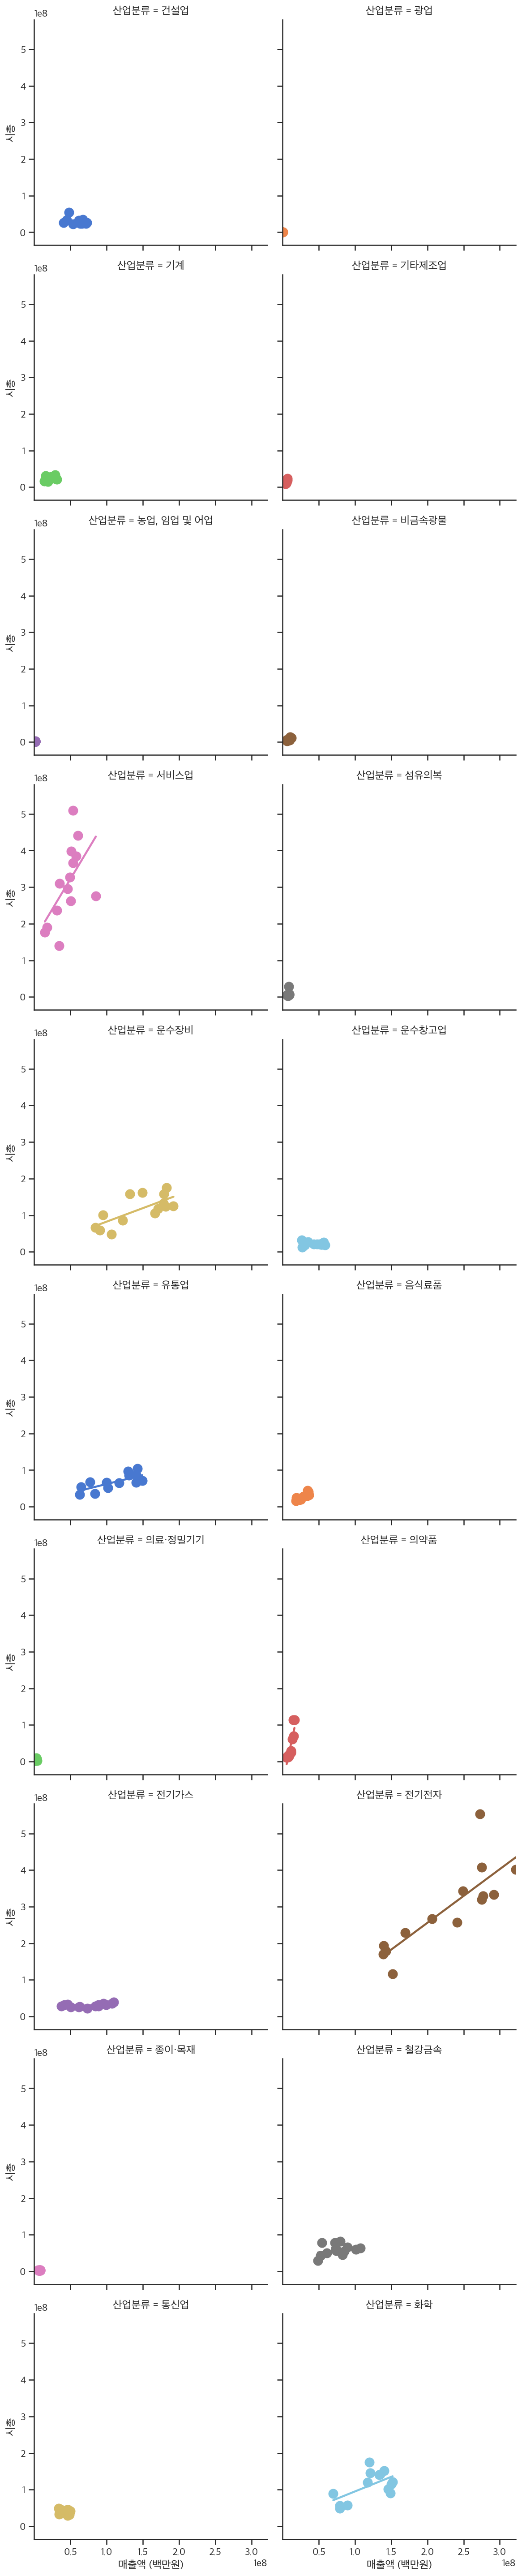

In [69]:
# import seaborn as sns
# sns.set_theme(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="매출액 (백만원)", y="시총", col="산업분류", hue="산업분류", data=df_not_manuf,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 100, "alpha": 1})

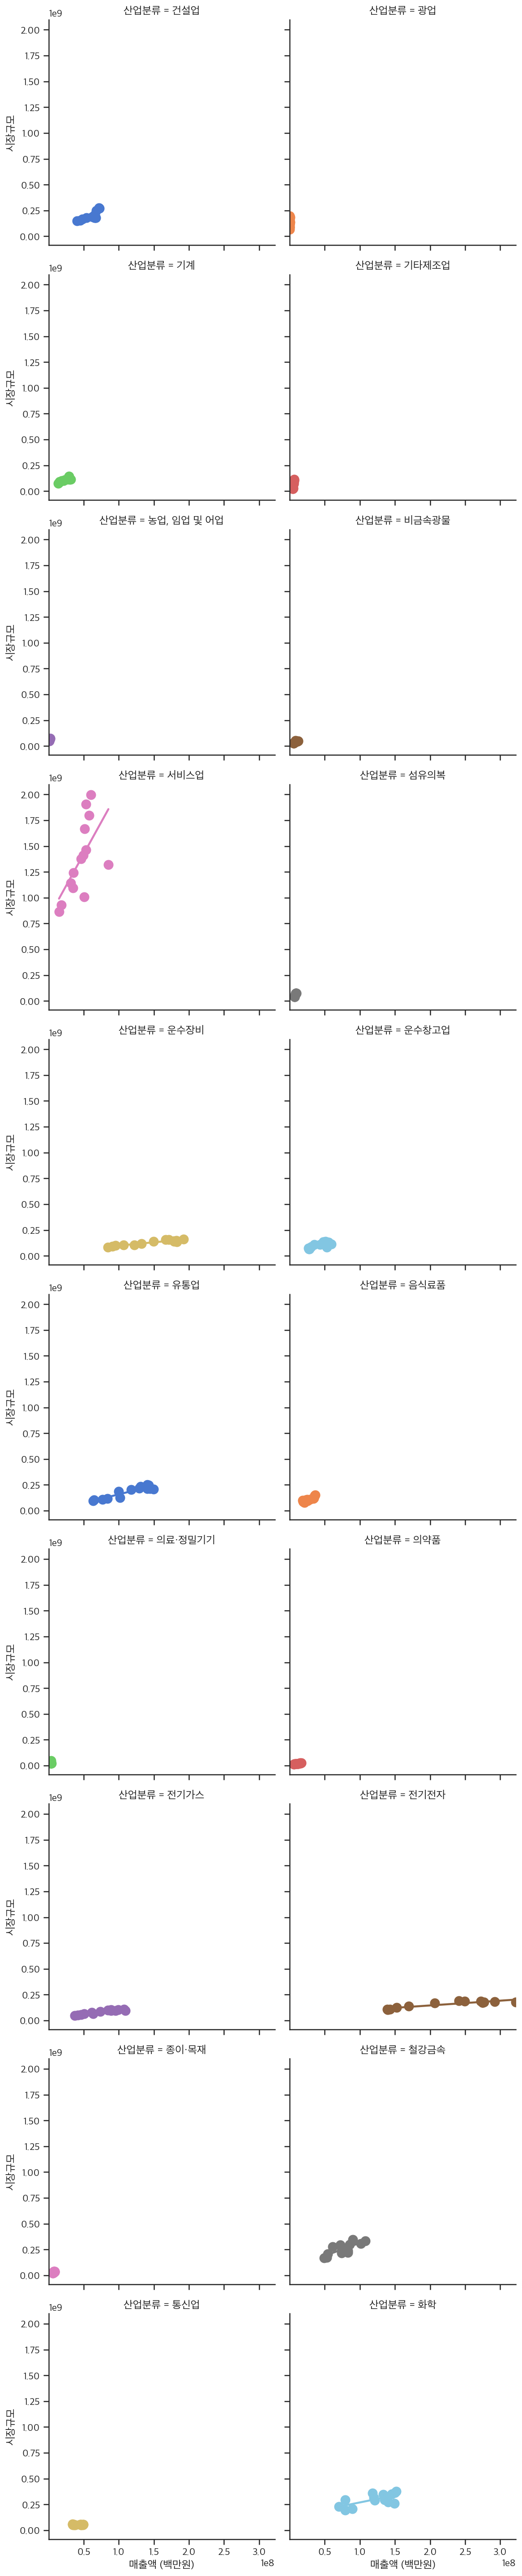

In [70]:
sns.lmplot(x="매출액 (백만원)", y="시장규모", col="산업분류", hue="산업분류", data=df_not_manuf,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 100, "alpha": 1})

In [81]:
df_not_manuf.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,54,40785394,2029565,3096864,2885231,3.670,4.955,36.710,6.780,13.245,7.915,150470135,26444487
1,건설업,2006,57,44745972,2755247,3657870,3652228,12.410,5.850,46.305,7.950,14.790,8.855,153315180,33138291
2,건설업,2007,57,47834524,2802313,3566035,3718370,5.065,4.870,38.700,6.545,11.275,6.450,166693235,53907176
3,건설업,2008,56,53570702,3195413,3672975,4577360,16.480,4.120,37.405,6.090,9.690,5.475,180679909,22653768
4,건설업,2009,55,61989084,1812152,3385664,2769115,18.770,2.270,24.915,3.400,5.765,3.150,188031835,31828104


In [79]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [87]:
plt.rcParams['figure.figsize'] = 16,8

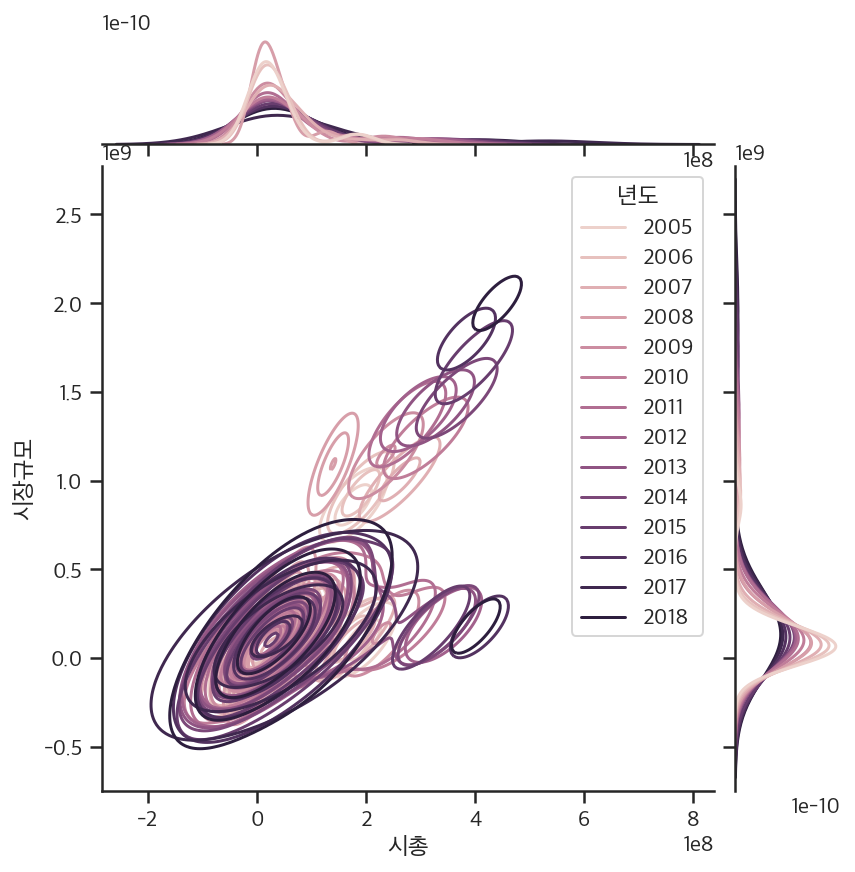

In [100]:
import seaborn as sns
# sns.set_theme(style="ticks")

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=df_not_manuf,
    x="시총", y="시장규모", hue="년도",
    kind="kde",
)

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# sns.set_theme(style="ticks")

diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [78]:
# Load the brain networks dataset, select subset, and collapse the multi-index
# df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
df = df_not_manuf

# used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values(0)
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

TypeError: Cannot cast Index to dtype int64